In [1]:
import lightkurve as lk
from lightkurve import search_lightcurvefile
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import csv
import pandas as pd

/home/fran/anaconda3/lib/python3.8/site-packages/lightkurve/config/__init__.py:119: UserWarning: The default Lightkurve cache directory, used by download(), etc., has been moved to /home/fran/.lightkurve/cache. Please move all the files in the legacy directory /home/fran/.lightkurve-cache to the new location and remove the legacy directory. Refer to https://docs.lightkurve.org/reference/config.html#default-cache-directory-migration for more information.
  warnings.warn(


In [2]:
TIC_ID = 259377017  # TIC_ID of our candidate

In [3]:
# Check and download data you want 

lcf_120= lk.search_lightcurve('TIC '+str(TIC_ID), mission="tess",author='spoc',cadence=120).download_all() #explore and download the available data from SPOC for 120s 
lcf_20= lk.search_lightcurve('TIC '+str(TIC_ID), mission="tess",author='spoc',cadence=20).download_all() #explore and download the available data from SPOC for 20s 
lcf_600= lk.search_lightcurve('TIC '+str(TIC_ID), mission="tess",author='QLP', cadence=600).download_all() #explore and download the available data from QLP for 600s
lcf_1800= lk.search_lightcurve('TIC '+str(TIC_ID), mission="tess",author='QLP', cadence=1800).download_all() #explore and download the available data from QLP for 1800s


In [4]:
#display what you found
print('Data for 120s: ',lcf_120)
print('***********************')
print('Data for 20s: ',lcf_20)
print('***********************')
print('Data for 600s: ',lcf_600)
print('***********************')
print('Data for 1800s: ',lcf_1800)
print('***********************')

Data for 120s:  LightCurveCollection of 5 objects:
    0: <TessLightCurve LABEL="TIC 259377017" SECTOR=3 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    1: <TessLightCurve LABEL="TIC 259377017" SECTOR=4 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    2: <TessLightCurve LABEL="TIC 259377017" SECTOR=5 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    3: <TessLightCurve LABEL="TIC 259377017" SECTOR=30 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    4: <TessLightCurve LABEL="TIC 259377017" SECTOR=32 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
***********************
Data for 20s:  LightCurveCollection of 2 objects:
    0: <TessLightCurve LABEL="TIC 259377017" SECTOR=30 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    1: <TessLightCurve LABEL="TIC 259377017" SECTOR=32 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
***********************
Data for 600s:  LightCurveCollection of 2 objects:
    0: <TessLightCurve LABEL="TIC 259377017" SECTOR=30 AUTHOR=QLP FLUX_ORIGIN=sap_flux>
    1: <TessLightCurve LABEL="TIC 259377017" SECTOR=32 AUTHOR=QLP FLUX_

In [5]:
#Lets focus on the data with 120s

lc=lcf_120.stitch().remove_nans() # remove of the nans 
flux=lc.flux
flux_err=lc.flux_err
time=lc.time
lc_new=lk.LightCurve(time=time, flux=flux,flux_err=flux_err) # we create a lightkurve object
flux_clean=lc_new.remove_outliers(sigma_lower=float('inf'), sigma_upper=float('inf')) # if you want to remove some outliers, here not done. 


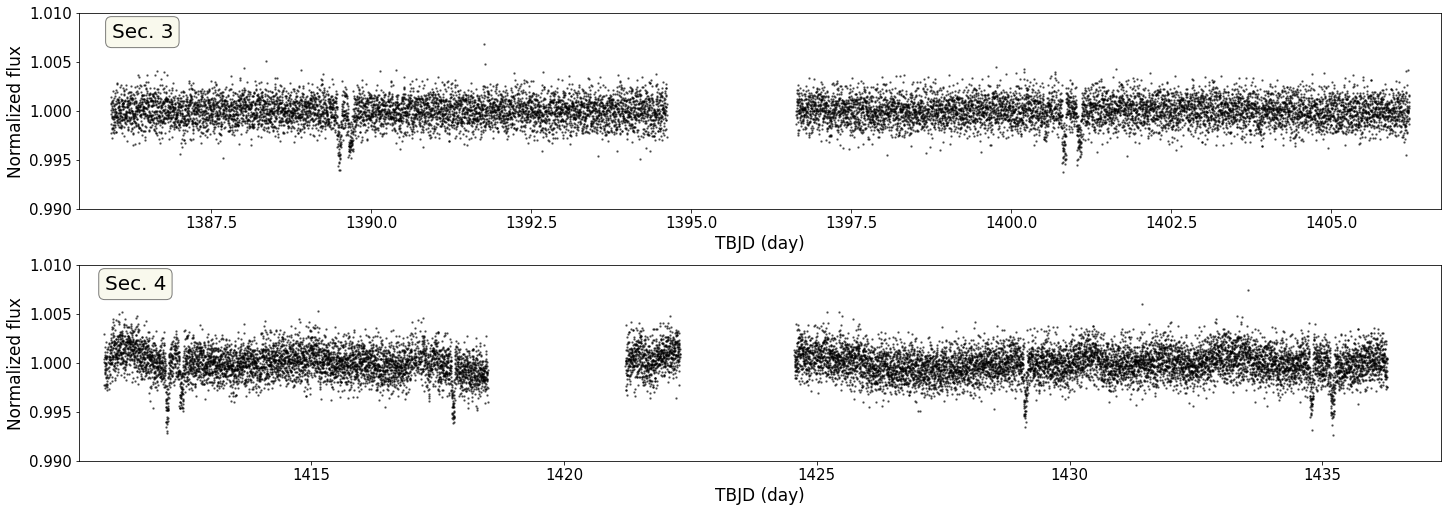

In [6]:
#Let's plot the data only sectors 3 and 4 

color1='black'


fig1, (ax1,ax2) = plt.subplots(2, 1, figsize=(20,7),constrained_layout=True)
fig1.patch.set_facecolor('xkcd:white')
props = dict(boxstyle='round', facecolor='beige', alpha=0.5)

ax1.scatter(flux_clean.time.value, flux_clean.flux.value, color=color1, s=2, alpha=0.5,rasterized=True)
ax1.set_xlim(lcf_120[0]['time'][0].value-0.5,lcf_120[0]['time'][-1].value+0.5)
ax1.set_ylim(0.990,1.01)
ax1.set_ylabel('Normalized flux',fontsize=17)
ax1.set_xlabel('TBJD (day)',fontsize=17)
ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.text(lcf_120[0]['time'][0].value+0.01, 1.009, "Sec. 3", fontsize=20, verticalalignment='top', bbox=props)


ax2.scatter(flux_clean.time.value, flux_clean.flux.value, color=color1, s=2, alpha=0.5,rasterized=True)
ax2.set_xlim(lcf_120[1]['time'][0].value-0.5,lcf_120[1]['time'][-1].value+0.5)
ax2.set_ylim(0.990,1.01)
ax2.set_ylabel('Normalized flux',fontsize=17)
ax2.set_xlabel('TBJD (day)',fontsize=17)
ax2.tick_params(axis='both', which='major', labelsize=15)
ax2.text(lcf_120[1]['time'][0].value+0.01, 1.009, "Sec. 4", fontsize=20, verticalalignment='top', bbox=props)

plt.savefig('TIC_'+str(TIC_ID)+'.png', dpi=200)



In [7]:
#Let's save the all the 120 data in a csv file 

TOI_270=open('TOI270_lc_120.csv', 'w')
writer=csv.DictWriter(TOI_270,delimiter=',',fieldnames=['#time', 'flux', 'flux_err'])
writer.writeheader()
writer=csv.writer(TOI_270, delimiter=',',lineterminator='\n')
for i in range(0,len(flux_clean.time.value)):
    writer.writerow((flux_clean.time.value[i],flux_clean.flux[i],flux_clean.flux_err.value[i]))
TOI_270.close()